# Predicting heart Disease Using Machine Learning

**This project was done to build a Machine Learning Model that can predict if a patient has heart diesease or not based on their medical data and other factors**


**DISCLAIMER : This does not teach you about Data Science/Machine learning.It is just a project I tried my hands on and its mainly for those who already know about this field and would like to experience a real life end to end Data Science/Machine Learning Workflow on Structured Data**


In [1]:
# Importing tools
# Regular Exploratory Data Analysis(EDA)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# We want plots to appear in the notebook
%matplotlib inline

#Models from Sckit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,plot_roc_curve



## Information on the DataFrame

1.age-
age in years

2.sex-
(1 = male; 0 = female)


3.cp-
chest pain 

4.trestbps-
resting blood pressure (in mm Hg on admission to the hospital)


5.chol-
serum cholestoral in mg/dl


6.fbs-
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)


7.restecg-
resting electrocardiographic results


8.thalach-
maximum heart rate achieved


9.exang-
exercise induced angina (1 = yes; 0 = no)


10.oldpeak-
ST depression induced by exercise relative to rest


11.slope-
the slope of the peak exercise ST segment

12.ca-
number of major vessels (0-3) colored by flourosopy


13.thal-
3 = normal; 6 = fixed defect; 7 = reversable defect


14.target-
1=Heart Disease or 0=No Heart Disease

Original Data can be retrieved from https://archive.ics.uci.edu/ml/datasets/heart+Disease

Also a Kaggle Version from
https://www.kaggle.com/ronitf/heart-disease-uci

## Load Data

In [2]:
df=pd.read_csv("heart-disease.csv")
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

## Exploratory Data Analysis (EDA)
* The Goal here is to find more about the data and know if there exists any relationship between columns


1. What Questions are you trying to solve
2. Kind of data and how to treat it
3. Are there any missing data and how to deal with it
4. Are there any outliers?How do we deal with that?
5. How to add,change or remove features to get more info from your data

In [3]:
df.target.value_counts() # Finding out how many of each class there are

1    165
0    138
Name: target, dtype: int64

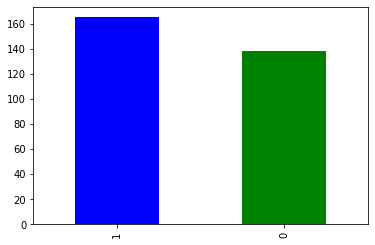

In [4]:
df.target.value_counts().plot(kind="bar",color=["Blue","Green"]);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum() #Missing Values?

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No null values

In [7]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

## Heart Disease Frequency according to sex

In [8]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
pd.crosstab(df.target,df.sex) #Comparing target and sex columns for some correlation

sex      0    1
target         
0       24  114
1       72   93

Per our data,there is **roughly** a 75% chance of a female having heart disease,50% chance of a male having heart disease and a 60% chance of anyone having heart disease

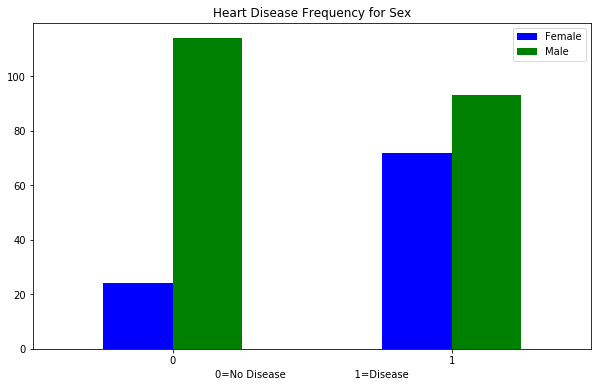

In [10]:
# Creating a plot for the crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["blue","green"])
plt.xlabel("0=No Disease                      1=Disease")
plt.title("Heart Disease Frequency for Sex")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [11]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

# Comparing Age and Thalach 

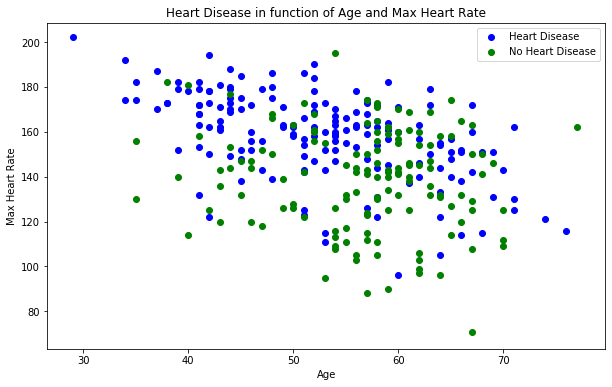

In [12]:
# Check the guide Above for what Thalach is
plt.figure(figsize=(10,6))
#Trying some positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],c='blue')

#Trying some negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],c="green")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease","No Heart Disease"]);

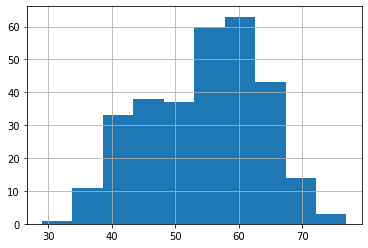

In [13]:
#Check the distribution of the age column with a histogram
df.age.hist();

Gladly no outliers over here

## Heart Disease Frquency per chest pain type

In [14]:
pd.crosstab(df.cp,df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

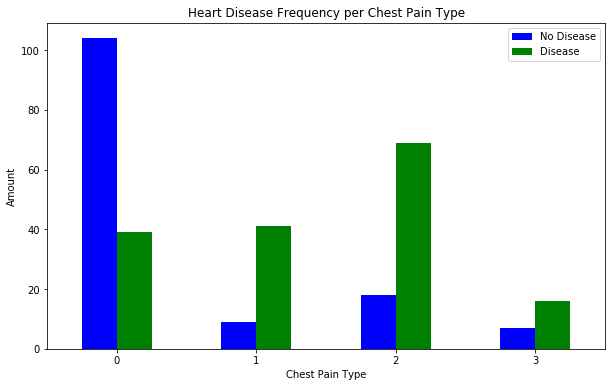

In [15]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),color=["blue","Green"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [16]:
# Make a correlation matrix
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

# This is complex to read.Why not visualize it?

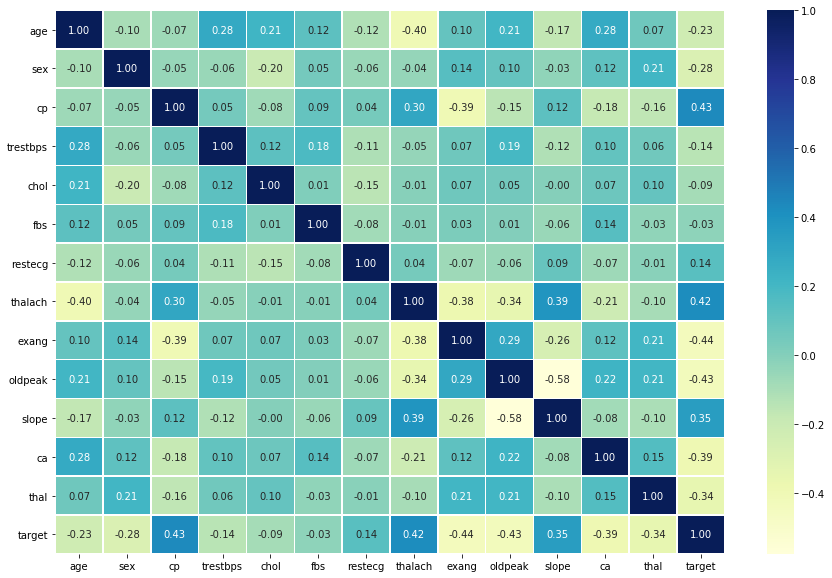

In [17]:
#Creating a heatmap with the data
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix
               ,annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu")

## Modelling

In [18]:
#Split Data into x and y
X=df.drop("target",axis=1)

y=df["target"]

In [19]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [20]:
# Split data into train and test sets
np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.2)

In [21]:
X_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   50    1   2       140   233    0        1      163      0      0.6   
71    51    1   2        94   227    0        1      154      1      0.0   
106   69    1   3       160   234    1        0      131      0      0.1   
270   46    1   0       120   249    0        0      144      0      0.8   
102   63    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  
132      2   0     2  
202      2   0     3  
196      1   0     2  
75       1   0     2  
176      2   2     3  
..     ...  ..   ...  
188      1   1     3  
71       2   1     3  
106      1   1     2  
270      2   0     3  
102      2   2     2  

[242 rows x 13 columns]

In [22]:
y_train,(len(y_train))

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

**Time to build the Machine Learning Model**

 We will try 3 different Machine Learning Models
 * Logistic Regression
 * K-Nearest Neighbors Classifier
 * Random Forest Classifier
 
 **All these shall be put in a function to avoid repetition of code**

In [23]:
# Put models in a dictionary
models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and scores given Machine Learning Models.
    models : A dict of different Sckit-Learn Machine Learning Models
    X_train : Training Data (No labels)
    X_test : Testing Data (No labels)
    y_train : Training Labels
    y_test : Test Labels    
    """
    np.random.seed(42)
    model_scores={}
    #Loop through models
    for name, model in models.items():
        model.fit(X_train,y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [24]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Model Comparison

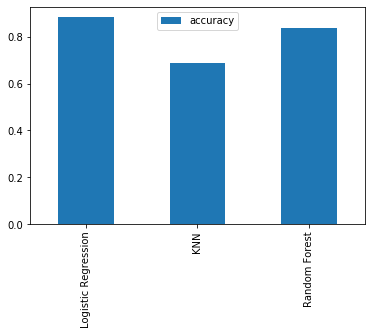

In [25]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

# Tuning the Model

We know baseline models might not always be the final models.Time for tuning

We will look at the following : 

* Hyperparameter Tuning
* feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area Under the Curve (AUC)

# Hyperparamter Tuning for KNN (By Hand)

In [26]:
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    
    test_scores.append(knn.score(X_test,y_test))

In [27]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


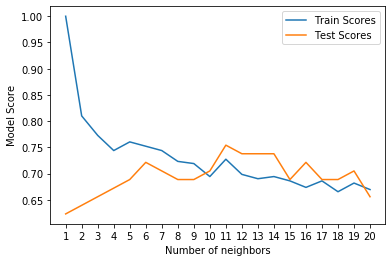

In [29]:
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")


**As you can see, the KNN model performs better when the n_neighbors is at 11 (Deafult=5). But since the score is not even above or near the Logistic Regression prediction,we might drop it for now**

## Logistic Regression and Random Forest Regressor Hyperparameter Tuning with RandomizedSearchCV

Tuning:
* LogisticRegression()
* RandomForestClassifier()
#### Using RandomizedSearchCV

In [30]:
# Create a Hyperparameter Grid for Logistic regresssion
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]} # "C" is normally the main hyperparameter that may be tuned in logistic regression

# Create a Hyperparameter GRid for Random Forest Classifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)} # "n_estimators" is also like the main hyperparamter to be tuned in Random Forest Classifier


In [31]:
# Tune Logistic Regression
np.random.seed(42)
# Setup random Hyperparameter search for Logistic Regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              n_iter=20,verbose=True)

# Fit random Hyperparameter search for Logistic Regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Funny how the score is the same for Logistic Regression after Tuning the Hyperparamter
Lets try for the Random forest

In [34]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                        n_iter=20,
                        verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.3min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [35]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [36]:
rs_rf.score(X_test,y_test)

0.8688524590163934

After tuning,it increased in accuracy by 3% but it is still not higher than Logistic regression so we might drop it for now and use GridSearchCV on the Logistic Regression Model

## Using GridSearchCV to tune Logistic Regression

In [37]:
# Create Different Hyperparamters for the Logistic regression model
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}
# Setting it up
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       verbose=True)#Notice how it is refered to as param_grid in GridSearchCV and param_distribution in RandomSearchCv

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04,...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

In [38]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [39]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

### After some tuning,we still were not able to improve the model so we will maintain this model for now

#### Evaluating our tuned classification model beyond accuracy
* Hyperparameter Tuning
* feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area Under the Curve (AUC)

In [40]:
#Make predictions with tuned model
y_preds=gs_log_reg.predict(X_test)

In [41]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [42]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

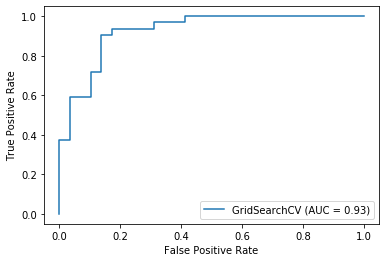

In [43]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg,X_test,y_test);

As you can see, the model has a nice AUC score of 0.93,which is very good

In [44]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


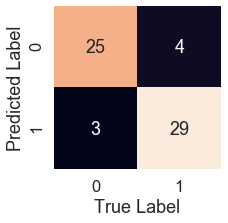

In [45]:
# Using Seaborn for the confusion matrix
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Plots a confusion matrix using seasborns heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
              annot=True,
              cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
plot_conf_mat(y_test,y_preds)


### From the heatmap, we can see that it has 4 False Negatives and 3 False Positives
This is critical since we would need the model to predict if someone has heart disease or not

In [46]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Since this classification report is only concentrated on one test,we will try it out with Cross Validation for more insight

#### Calculate evaluation metrics using cross validation

In [47]:
# Check best Hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [48]:
# Create a new classifier with best parameters
clf=LogisticRegression(C= 0.20433597178569418,
                       solver= 'liblinear')

In [49]:
#Cross -validated Accuracy
cv_acc=cross_val_score(clf,
                      X,
                      y,
                      scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [50]:
#Cross -validated precision
cv_precision=cross_val_score(clf,
                      X,
                      y,
                      scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [51]:
#Cross -validated recall
cv_recall=cross_val_score(clf,
                      X,
                      y,
                      scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9272727272727274

In [52]:
#Cross -validated f1 score
cv_f1=cross_val_score(clf,
                      X,
                      y,
                      scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1


0.8705403543192143

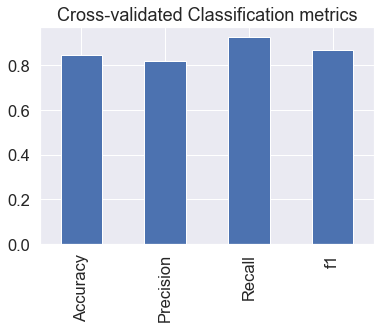

In [53]:
# Visualize cross-validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                       "Precision":cv_precision,
                       "Recall":cv_recall,
                       "f1":cv_f1},index=[0])
cv_metrics.T.plot.bar(title="Cross-validated Classification metrics",legend=False);

### Feature Importance
* It is another way of asking," Which features contributed most to the outcomes of the model and how did they contribute?"


Finding feature importance is different for each machine learning model

In [54]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [55]:
# Fit an instance of Logistic Regression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
clf= LogisticRegression(C= 0.20433597178569418, 
                        solver= 'liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
clf.coef_

array([[ 0.00316728, -0.86044636,  0.66067051, -0.01156993, -0.00166374,
         0.04386116,  0.31275829,  0.02459361, -0.60413071, -0.56862818,
         0.45051626, -0.63609888, -0.67663381]])

In [58]:
# Match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003167278990517721,
 'sex': -0.8604463644626569,
 'cp': 0.6606705054012705,
 'trestbps': -0.011569931335912368,
 'chol': -0.0016637438070300692,
 'fbs': 0.04386116284216185,
 'restecg': 0.31275829369964075,
 'thalach': 0.02459361297137234,
 'exang': -0.6041307139378419,
 'oldpeak': -0.5686281825180214,
 'slope': 0.450516263738603,
 'ca': -0.6360988840661891,
 'thal': -0.6766338062111971}

In [59]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df

age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.003167 -0.860446  0.660671  -0.01157 -0.001664  0.043861  0.312758   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.024594 -0.604131 -0.568628  0.450516 -0.636099 -0.676634

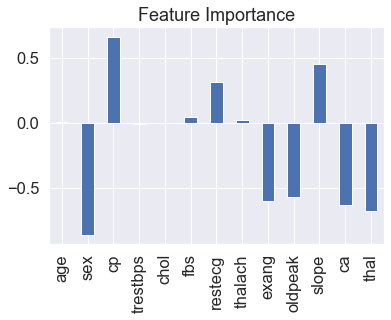

In [60]:
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [61]:
pd.crosstab(df["sex"],df["target"])

target    0   1
sex            
0        24  72
1       114  93

In [62]:
pd.crosstab(df["slope"],df["target"])

target   0    1
slope          
0       12    9
1       91   49
2       35  107

## Referring to the guide on the data from Kaggle
**Slope-The slope of the peak exercise ST segment**
* 0 : Upsloping: Better heart rate with exercise (uncommon)
* 1 : Flatsloping: Minimal change (Typical healthy heart)
* 2 : Downsloping: Signs of unhealthy heart

# Thank You
#### Special Thanks to Daniel Bourke and Andrei Neagoie